<a href="https://colab.research.google.com/github/jaydiaz2012/jaynderling_csvs/blob/main/sprint_2_credit_score_final_jeremie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

## Open the data file and have a look at the general information. 

In [2]:
# Loading all the libraries
import pandas as pd
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# Load the data
from google.colab import files 
data_to_load = files.upload()

Saving credit_scoring_eng.csv to credit_scoring_eng.csv


In [3]:
import io 
df = pd.read_csv(io.BytesIO(data_to_load['credit_scoring_eng.csv']))

## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

In [12]:
def check_data_stuff(df):
  print("Dataframe has {} rows and {} columns".format(df.shape[0], df.shape[1]))
  print('\n*********************************')
  print(df.describe())
  print('\n *********************************')
  print(df.shape)

check_data_stuff(df)

Dataframe has 21525 rows and 12 columns

*********************************
           children  days_employed     dob_years  education_id  \
count  21525.000000   19351.000000  21525.000000  21525.000000   
mean       0.538908   63046.497661     43.293380      0.817236   
std        1.381587  140827.311974     12.574584      0.548138   
min       -1.000000  -18388.949901      0.000000      0.000000   
25%        0.000000   -2747.423625     33.000000      1.000000   
50%        0.000000   -1203.369529     42.000000      1.000000   
75%        1.000000    -291.095954     53.000000      1.000000   
max       20.000000  401755.400475     75.000000      4.000000   

       family_status_id          debt   total_income  
count      21525.000000  21525.000000   19351.000000  
mean           0.972544      0.080883   26787.568355  
std            1.420324      0.272661   16475.450632  
min            0.000000      0.000000    3306.762000  
25%            0.000000      0.000000   16488.504500  


In [13]:
df.head(10)



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [14]:
df.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,secondary education,1,married,0,F,employee,1,17517.812,to become educated
21516,0,-914.391429,42,bachelor's degree,0,married,0,F,business,0,51649.244,purchase of my own house
21517,0,-404.679034,42,bachelor's degree,0,civil partnership,1,F,business,0,28489.529,buying my own car
21518,0,373995.710838,59,SECONDARY EDUCATION,1,married,0,F,retiree,0,24618.344,purchase of a car
21519,1,-2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car
21524,2,-1984.507589,40,secondary education,1,married,0,F,employee,0,13127.587,to buy a car


Observations:
<p>The days_employed column contain negative values. It needs to be investigated further. The entries in education column are inconsistent with the cases. Some are in lower case while the rest are in uppoer case. Education_id and family_status_id seems to show responses in various scale. Values in the Debt column seems to be Boolean. There's Nan in a single row which shows that there are duplicate values.</p>  

In [15]:
df.info(show_counts=True, verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [16]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [17]:
def check_data_category(df):
  print(df['education'].sort_values().unique())
  print('\n*********************************')
  print(df['gender'].sort_values().unique())
  print('\n *********************************')
  print(df['education'].sort_values().unique())
  print('\n *********************************')
  print(df['family_status'].sort_values().unique())
  print('\n *********************************')
  print(df['income_type'].sort_values().unique())
  print('\n *********************************')
  print(df['purpose'].sort_values().unique())

check_data_category(df)

["BACHELOR'S DEGREE" "Bachelor's Degree" 'GRADUATE DEGREE'
 'Graduate Degree' 'PRIMARY EDUCATION' 'Primary Education'
 'SECONDARY EDUCATION' 'SOME COLLEGE' 'Secondary Education' 'Some College'
 "bachelor's degree" 'graduate degree' 'primary education'
 'secondary education' 'some college']

*********************************
['F' 'M' 'XNA']

 *********************************
["BACHELOR'S DEGREE" "Bachelor's Degree" 'GRADUATE DEGREE'
 'Graduate Degree' 'PRIMARY EDUCATION' 'Primary Education'
 'SECONDARY EDUCATION' 'SOME COLLEGE' 'Secondary Education' 'Some College'
 "bachelor's degree" 'graduate degree' 'primary education'
 'secondary education' 'some college']

 *********************************
['civil partnership' 'divorced' 'married' 'unmarried' 'widow / widower']

 *********************************
['business' 'civil servant' 'employee' 'entrepreneur'
 'paternity / maternity leave' 'retiree' 'student' 'unemployed']

 *********************************
['building a property' 'buildin

In [18]:
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].describe().transpose()

,count,unique,top,freq
education,21525,15,secondary education,13750
family_status,21525,5,married,12380
gender,21525,3,F,14236
income_type,21525,8,employee,11119
purpose,21525,38,wedding ceremony,797


In [19]:
numCol  = df.dtypes[df.dtypes != "0"].index
df[numCol].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
children,21525.0,0.538908,1.381587,-1.000000,0.000000,0.000000,1.000000,20.000000
days_employed,19351.0,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,401755.400475
dob_years,21525.0,43.293380,12.574584,0.000000,33.000000,42.000000,53.000000,75.000000
education_id,21525.0,0.817236,0.548138,0.000000,1.000000,1.000000,1.000000,4.000000
family_status_id,21525.0,0.972544,1.420324,0.000000,0.000000,0.000000,1.000000,4.000000
debt,21525.0,0.080883,0.272661,0.000000,0.000000,0.000000,0.000000,1.000000
total_income,19351.0,26787.568355,16475.450632,3306.762000,16488.504500,23202.870000,32549.611000,362496.645000


In [20]:
for d in df.columns:
  print(d)
  print(df[d].value_counts())
  print('\n**********************************\n')

children
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

**********************************

days_employed
-8437.673028      1
-3507.818775      1
 354500.415854    1
-769.717438       1
-3963.590317      1
                 ..
-1099.957609      1
-209.984794       1
 398099.392433    1
-1271.038880      1
-1984.507589      1
Name: days_employed, Length: 19351, dtype: int64

**********************************

dob_years
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
6

In [22]:
df.isnull().sum().sort_values(ascending=False)

days_employed       2174
total_income        2174
children               0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
purpose                0
dtype: int64

Observations: 
<p> 1. Using the .describe () method, we can see that the count in some columns are inconsistent. There are missing values in columns days_employed and total_income. Based on previous observations, there are also duplicated values and other discrepancies in the columns.</p>
<p> 2. Both days_employed and total_income have exactly the same number of missing values. At present, I don't see if both correlates to one another. Although, since the aim is to find out the likelihood customers can default on their loan applications, total_income can affect the result. Credit score depends on the financial capability of the customers.</p>  

In [23]:
df.value_counts()


children  days_employed   dob_years  education            education_id  family_status      family_status_id  gender  income_type    debt  total_income  purpose                                 
-1        -9851.184337    44         secondary education  1             divorced           3                 F       employee       0     17758.530     to own a car                                1
 1        -7117.338200    42         secondary education  1             married            0                 F       civil servant  0     36511.880     housing renovation                          1
          -7137.319761    35         secondary education  1             married            0                 F       employee       0     20696.434     property                                    1
          -7146.299384    50         bachelor's degree    0             married            0                 F       employee       0     16782.180     housing transactions                        1
          -7152

In [24]:
df.mean()

children                0.538908
days_employed       63046.497661
dob_years              43.293380
education_id            0.817236
family_status_id        0.972544
debt                    0.080883
total_income        26787.568355
dtype: float64

In [25]:
df.median()

children                0.000000
days_employed       -1203.369529
dob_years              42.000000
education_id            1.000000
family_status_id        0.000000
debt                    0.000000
total_income        23202.870000
dtype: float64

**Intermediate conclusion**

The number of rows in the filtered table match the number of missing values. The values could be erroneous but still considered as values due to their data type.  

Next steps to check and investigate further the columns with the missing values. 

In [125]:
round(10* (df.isnull().sum() / len(df)*10)).sort_values(ascending=False)

children            0.0
days_employed       0.0
dob_years           0.0
education           0.0
education_id        0.0
family_status       0.0
family_status_id    0.0
gender              0.0
income_type         0.0
debt                0.0
total_income        0.0
purpose             0.0
dtype: float64

In [126]:
round(100 * (df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

0        0.0
14311    0.0
14309    0.0
14308    0.0
14307    0.0
        ... 
7124     0.0
7123     0.0
7122     0.0
7121     0.0
21524    0.0
Length: 19260, dtype: float64

The missing values are both the same number in th columns, days_employed and total_income.  

In [33]:
missing_values = df.isnull().sum()
print(missing_values)

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


In [128]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [36]:
df.dropna(subset=['days_employed', 'total_income'], inplace=True)

In [37]:
df.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [38]:
df.shape

(19351, 12)

**Conclusion**

The filtered table is not the same as the original table. There were missing values that were dropped. From 21525 rows, it shrank to 19351 rows. The pattern is that both days_employed and total_income have the same number of missing values. The two aforementined columns should be further investigated  to check if they affect each other.  

## Data transformation


In [39]:
print(df.duplicated().sum())

0


In [40]:
df['education'].value_counts()

secondary education    12342
bachelor's degree       4222
SECONDARY EDUCATION      705
Secondary Education      646
some college             613
BACHELOR'S DEGREE        251
Bachelor's Degree        243
primary education        231
Some College              40
SOME COLLEGE              22
PRIMARY EDUCATION         16
Primary Education         14
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

**Checking the education attainment of the loan applicants.**

In [42]:
df['education'].sort_values().unique() 


array(["BACHELOR'S DEGREE", "Bachelor's Degree", 'GRADUATE DEGREE',
       'Graduate Degree', 'PRIMARY EDUCATION', 'Primary Education',
       'SECONDARY EDUCATION', 'SOME COLLEGE', 'Secondary Education',
       'Some College', "bachelor's degree", 'graduate degree',
       'primary education', 'secondary education', 'some college'],
      dtype=object)

In [43]:
def replace_wrong_education(wrong_education, correct_education): 
    for wrong_educ in wrong_education: 
        df['education'] = df['education'].replace(wrong_educ, correct_education)



In [44]:
duplicates = ["BACHELOR\'S DEGREE", "Bachelor\'s Degree"] 
name = 'bachelor\'s degree'
replace_wrong_education(duplicates, name)
duplicates = ["GRADUATE DEGREE", "Graduate Degree"] 
name = 'graduate degree'
replace_wrong_education(duplicates, name)
duplicates = ["PRIMARY EDUCATION", "Primary Education"] 
name = 'primary education'
replace_wrong_education(duplicates, name)
duplicates = ["SECONDARY EDUCATION", "Secondary Education"] 
name = 'secondary education'
replace_wrong_education(duplicates, name)
duplicates = ["SOME COLLEGE", "Some College"] 
name = 'some college'
replace_wrong_education(duplicates, name)

In [45]:
print(df['education'].sort_values().unique())

["bachelor's degree" 'graduate degree' 'primary education'
 'secondary education' 'some college']


In [46]:
df.shape

(19351, 12)

In [47]:
df['education']

0          bachelor's degree
1        secondary education
2        secondary education
3        secondary education
4        secondary education
                ...         
21520    secondary education
21521    secondary education
21522    secondary education
21523    secondary education
21524    secondary education
Name: education, Length: 19351, dtype: object

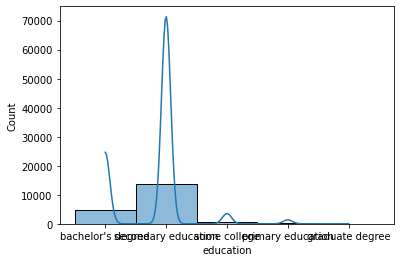

In [54]:
import seaborn as sns
sns.histplot(x=df['education'], bins=10, kde=True);

**Checking the number of children of the loan applicants.**

In [48]:
df['children'].value_counts()


 0     12710
 1      4343
 2      1851
 3       294
 20       67
-1        44
 4        34
 5         8
Name: children, dtype: int64

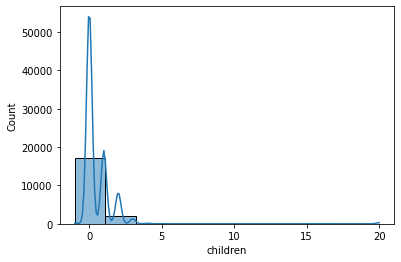

In [51]:
sns.histplot(x=df['children'], bins=10, kde=True);

In [61]:
df[df['children'] == 20].shape

(67, 12)

In [62]:
df[df['children'] == 20]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,-880.221113,21,secondary education,1,married,0,M,business,0,23253.578,purchase of the house
720,20,-855.595512,44,secondary education,1,married,0,F,business,0,18079.798,buy real estate
1074,20,-3310.411598,56,secondary education,1,married,0,F,employee,1,36722.966,getting an education
2510,20,-2714.161249,59,bachelor's degree,0,widow / widower,2,F,employee,0,42315.974,transactions with commercial real estate
2941,20,-2161.591519,0,secondary education,1,married,0,F,employee,0,31958.391,to buy a car
...,...,...,...,...,...,...,...,...,...,...,...,...
20355,20,-2695.079206,45,secondary education,1,civil partnership,1,M,employee,1,28467.621,having a wedding
21008,20,-1240.257910,40,secondary education,1,married,0,F,employee,1,21363.842,to own a car
21325,20,-601.174883,37,secondary education,1,married,0,F,business,0,16477.771,profile education
21404,20,-494.788448,52,secondary education,1,married,0,M,business,0,25060.749,transactions with my real estate


In [63]:
df['children'] = df['children'].replace([20], 2)

In [64]:
df[df['children'] == 20].shape

(0, 12)

In [65]:
df['children'].value_counts()

 0    12710
 1     4343
 2     1918
 3      294
-1       44
 4       34
 5        8
Name: children, dtype: int64

In [66]:
df[df['children'] == -1].shape

(44, 12)

In [67]:
df[df['children'] == -1]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,-4417.703588,46,secondary education,1,civil partnership,1,F,employee,0,16450.615,profile education
705,-1,-902.084528,50,secondary education,1,married,0,F,civil servant,0,22061.264,car purchase
742,-1,-3174.456205,57,secondary education,1,married,0,F,employee,0,10282.887,supplementary education
800,-1,349987.852217,54,secondary education,1,unmarried,4,F,retiree,0,13806.996,supplementary education
1363,-1,-1195.264956,55,secondary education,1,married,0,F,business,0,11128.112,profile education
1929,-1,-1461.303336,38,secondary education,1,unmarried,4,M,employee,0,17459.451,purchase of the house
2073,-1,-2539.761232,42,secondary education,1,divorced,3,F,business,0,26022.177,purchase of the house
3814,-1,-3045.290443,26,secondary education,1,civil partnership,1,F,civil servant,0,21102.846,having a wedding
4201,-1,-901.101738,41,secondary education,1,married,0,F,civil servant,0,36220.123,transactions with my real estate
4402,-1,398001.302888,64,secondary education,1,married,0,F,retiree,0,26122.250,buy real estate


In [68]:
df['children'] = df['children'].replace([-1], 1)

In [69]:
df[df['children'] == -1].shape

(0, 12)

In [70]:
df['children'].value_counts()

0    12710
1     4387
2     1918
3      294
4       34
5        8
Name: children, dtype: int64

Observations:
<p>In the children column, there are values with negative values (-1) and 20. This could be a human error of putting in the correct values which are 1 and 2 respectively. Thus, I replaced those incorrect values with the right ones.</p> 

In [129]:
df['children']


0        1
1        1
2        0
3        3
4        0
        ..
21520    1
21521    0
21522    1
21523    3
21524    2
Name: children, Length: 19260, dtype: int64

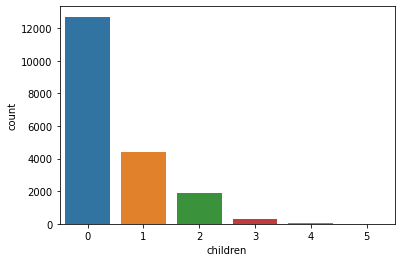

In [73]:
sns.countplot('children', data =df)
plt.show()

**Checking the 'days_employed' column.**
</p>The main issues will be the length of days the customers were employed. Its a float, so, it can only mean some worked less than a day. But when cross-referencing it with income_type column which shows values of student, retired... it needs to be investigated. The income_type column could have impact to the days_employed column.</p>


In [74]:
df['days_employed'].describe()


count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [75]:
df['days_employed'].isnull().sum() / len(df['days_employed']) * 100

0.0

In [76]:
df['days_employed'] = df['days_employed'].fillna(0)

**Observations:**
Looking at the statistics table, the max value is 401755 which is impossible as the number of days in the working age of an individual as well as the min value as negative. It needs to be further investigated. 

In [77]:
df['days_employed'] = df['days_employed'].apply(lambda x: abs(x) if x < 0 else x)
df['days_employed'].describe()


count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

In [78]:
df['days_employed'].sort_values(ascending=False)

6954     401755.400475
10006    401715.811749
7664     401675.093434
2156     401674.466633
7794     401663.850046
             ...      
2127         34.701045
9683         33.520665
6157         30.195337
8336         24.240695
17437        24.141633
Name: days_employed, Length: 19351, dtype: float64

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
1%          113.426296
10%         385.009877
25%         927.009265
50%        2194.220567
75%        5537.882441
99%      397588.993236
max      401755.400475
Name: days_employed, dtype: float64



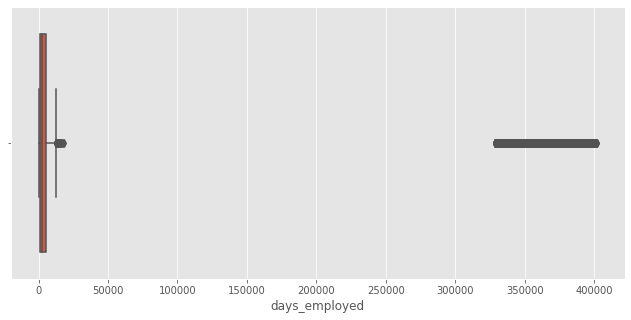

In [79]:
print(df['days_employed'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(df['days_employed'])
plt.show()

In [80]:
df[(df['days_employed'] >= 300000) & (df['days_employed']<=450000)]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,27432.971,transactions with commercial real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,12070.399,to have a wedding
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property
21509,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions
21518,0,373995.710838,59,secondary education,1,married,0,F,retiree,0,24618.344,purchase of a car


In [81]:
print(df[(df['days_employed'] >= 300000) & (df['days_employed']<=450000)])

       children  days_employed  dob_years            education  education_id  \
4             0  340266.072047         53  secondary education             1   
18            0  400281.136913         53  secondary education             1   
24            1  338551.952911         57  secondary education             1   
25            0  363548.489348         67  secondary education             1   
30            1  335581.668515         62  secondary education             1   
...         ...            ...        ...                  ...           ...   
21505         0  338904.866406         53  secondary education             1   
21508         0  386497.714078         62  secondary education             1   
21509         0  362161.054124         59    bachelor's degree             0   
21518         0  373995.710838         59  secondary education             1   
21521         0  343937.404131         67  secondary education             1   

           family_status  family_status

**Checking the 'dob_years' column.**

In [130]:
df['dob_years'].value_counts()


35    553
41    548
38    544
40    543
34    534
42    532
33    530
39    522
44    503
29    495
31    495
48    492
36    492
37    484
30    482
32    473
43    463
50    463
49    458
27    457
45    447
28    446
56    433
52    431
46    427
54    424
47    421
53    415
59    410
58    405
57    404
51    398
55    395
26    373
60    338
25    334
61    317
62    314
24    243
63    240
64    228
23    218
65    174
22    166
66    163
67    151
21     93
68     90
69     80
70     62
71     53
20     46
72     31
19     13
73      7
74      6
75      1
Name: dob_years, dtype: int64

In [83]:
df[df['dob_years'] == 0]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,secondary education,1,married,0,F,retiree,0,11406.644,car
149,0,2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation
578,0,397856.565013,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property
1040,0,1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car
...,...,...,...,...,...,...,...,...,...,...,...,...
19371,1,2356.250615,0,bachelor's degree,0,married,0,F,business,0,12469.795,car
20462,0,338734.868540,0,secondary education,1,married,0,F,retiree,0,41471.027,purchase of my own house
20577,0,331741.271455,0,secondary education,1,unmarried,4,F,retiree,0,20766.202,property
21179,2,108.967042,0,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate


In [84]:
df['dob_years'].describe()

count    19351.000000
mean        43.255336
std         12.579170
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

**Observations**
<p>It's better to drop the rows with 0 values since its impossible to think clients have no age. This is clearly a human error but there's no way of knowing what's the correct input of these zero ages.</p> 

In [85]:
index = df[(df['dob_years'] >= 100)|(df['dob_years'] <= 18)].index
df.drop(index, inplace=True)
df['dob_years'].describe()

count    19260.000000
mean        43.459709
std         12.251560
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [86]:
df.loc[98:100, :]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
98,0,364906.205736,54,bachelor's degree,0,married,0,F,retiree,0,31953.168,buying property for renting out
100,0,605.026441,49,secondary education,1,widow / widower,2,F,employee,1,28221.581,real estate transactions


In [87]:
print(df[df['dob_years'] == 0])

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []


**Check the `family_status` column**

In [88]:
df['family_status'].value_counts()

married              11098
civil partnership     3717
unmarried             2510
divorced              1074
widow / widower        861
Name: family_status, dtype: int64

Observations: No issues. Data seems solid and believable with the categories.

**Checking the 'gender' column.**

In [102]:
df['gender'].value_counts()

F    12689
M     6571
Name: gender, dtype: int64

**Observations.**
<p> The value XNA is erroneous. Either the loan applicant prefers not to disclose the gender or some human error, it should be corrected. Slicing the dataframe to investigated, it looks like the loan applicant is Female. Thus, I converted the erroneous value to F. 

In [112]:
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [106]:
df['gender'] = df['gender'].apply(lambda x: 'F' if x == 'XNA' else x)
df['gender'].value_counts()

F    12689
M     6571
Name: gender, dtype: int64

In [107]:
df.loc[10701, 'gender']



'F'

**Check the `income_type` column.**

In [108]:
# Let's see the values in the column
df['income_type'].value_counts()

employee                       9964
business                       4559
retiree                        3426
civil servant                  1306
unemployed                        2
student                           1
entrepreneur                      1
paternity / maternity leave       1
Name: income_type, dtype: int64

In [109]:
# Address the problematic values, if they exist
df['income_type'].isnull().sum() / len(df['income_type']) * 100

0.0

In [110]:
df[df['income_type'] == 'paternity / maternity leave']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
20845,2,3296.759962,39,secondary education,1,married,0,F,paternity / maternity leave,1,8612.661,car


In [111]:
df['income_type'] = df['income_type'].apply(lambda x: 'employee' if x == 'paternity / maternity leave' else x)

In [119]:
print(df[df['income_type'] == 'paternity / maternity leave'])

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []


**Checking Duplicates**

In [120]:
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are Duplicate Data.' 
    else :
        return 'Data is clean. No Duplicate Data Found.'

In [121]:
check_duplicate(df)

'Data is clean. No Duplicate Data Found.'

In [122]:
df.duplicated().sum()

0

In [123]:
df.shape


(19260, 12)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19260 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          19260 non-null  int64  
 1   days_employed     19260 non-null  float64
 2   dob_years         19260 non-null  int64  
 3   education         19260 non-null  object 
 4   education_id      19260 non-null  int64  
 5   family_status     19260 non-null  object 
 6   family_status_id  19260 non-null  int64  
 7   gender            19260 non-null  object 
 8   income_type       19260 non-null  object 
 9   debt              19260 non-null  int64  
 10  total_income      19260 non-null  float64
 11  purpose           19260 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.4+ MB


**Observations**
<p> The original dataframe has inconsistent values with 21525 entries and 23 columns. The columns days_employed and total_income have the same number of missing values. After correcting for missing values, duplicates, dropping and replacing erroneous errors, the filtered dataframe have now 19260 entries that is consistent all throughout the columns. 

# Working with missing values

### Restoring missing values in `total_income`

In [197]:
df['total_income'].isna().sum()

0

**Categorizing Age Group**

In [131]:
def age_group(dob_years):
    if dob_years <= 18:
        return 'Child'
    if dob_years <= 64:
        return 'Adult'
    return 'Retired'    

In [132]:
print(age_group(20)) 

Adult


In [137]:
df['age_group'] = df['dob_years'].apply(age_group)
print(df.head(10)) 

   children  days_employed  dob_years            education  education_id  \
0         1    8437.673028         42    bachelor's degree             0   
1         1    4024.803754         36  secondary education             1   
2         0    5623.422610         33  secondary education             1   
3         3    4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   
5         0     926.185831         27    bachelor's degree             0   
6         0    2879.202052         43    bachelor's degree             0   
7         0     152.779569         50  secondary education             1   
8         2    6929.865299         35    bachelor's degree             0   
9         0    2188.756445         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1

In [141]:
grouped = pd.pivot_table(data=df, index='age_group', values='dob_years', aggfunc='count')
print(grouped)

           dob_years
age_group           
Adult          18442
Retired          818


In [142]:
grouped1 = pd.pivot_table(data=df, index='age_group', values='total_income', aggfunc='median')
print(grouped1)

           total_income
age_group              
Adult         23382.688
Retired       18471.391


**Observations:**
<p> There are more than 95% loan applicants who are adults than retired. Adults are more able to pay back their loan rather than retired. However, looking at the total income of the age group, the retired loan applicants are close to adult loan applicants which means the retired loan applicants are capable of paying back their loan. 

In [143]:
df['total_income'].head(10)

0    40620.102
1    17932.802
2    23341.752
3    42820.568
4    25378.572
5    40922.170
6    38484.156
7    21731.829
8    15337.093
9    23108.150
Name: total_income, dtype: float64

In [144]:
df['total_income'].describe()


count     19260.000000
mean      26794.435857
std       16493.972601
min        3306.762000
25%       16494.872500
50%       23201.873500
75%       32539.207750
max      362496.645000
Name: total_income, dtype: float64

In [145]:
df1 = df[categorical]
df1.head()

,education,family_status,gender,income_type,purpose
0,bachelor's degree,married,F,employee,purchase of the house
1,secondary education,married,F,employee,car purchase
2,secondary education,married,M,employee,purchase of the house
3,secondary education,married,M,employee,supplementary education
4,secondary education,civil partnership,F,retiree,to have a wedding


**Grouping Categorical Columns with Total_Income**
<p> To find out if there is a correlation of some of the categorical columns to total_income, I used groupby and get their mean and median values.</p>

In [146]:
df_groupby = df.groupby(['gender','education','family_status'])['total_income'].aggregate('mean').unstack()
print(df_groupby)

family_status               civil partnership      divorced       married  \
gender education                                                            
F      bachelor's degree         30457.299251  30990.335287  30072.373307   
       graduate degree                    NaN           NaN  29345.394000   
       primary education         19979.276857  19804.439800  19148.954475   
       secondary education       23032.993352  24017.901757  22269.478019   
       some college              25663.093436  37463.759778  26808.754188   
M      bachelor's degree         39399.934916  40913.058293  40388.886142   
       graduate degree                    NaN  18551.846000  29373.096500   
       primary education         20135.487067  18320.423600  25400.655229   
       secondary education       28346.883412  27930.500168  28744.833042   
       some college              32752.735694  28843.260000  35104.973386   

family_status                  unmarried  widow / widower  
gender educatio

In [147]:
df_groupby.sort_values(by=['gender'], ascending=False)

family_status               civil partnership      divorced       married  \
gender education                                                            
M      bachelor's degree         39399.934916  40913.058293  40388.886142   
       graduate degree                    NaN  18551.846000  29373.096500   
       primary education         20135.487067  18320.423600  25400.655229   
       secondary education       28346.883412  27930.500168  28744.833042   
       some college              32752.735694  28843.260000  35104.973386   
F      bachelor's degree         30457.299251  30990.335287  30072.373307   
       graduate degree                    NaN           NaN  29345.394000   
       primary education         19979.276857  19804.439800  19148.954475   
       secondary education       23032.993352  24017.901757  22269.478019   
       some college              25663.093436  37463.759778  26808.754188   

family_status                  unmarried  widow / widower  
gender education                                           
M      bachelor's degree    33541.957563     23360.727455  
       graduate degree      31771.321000              NaN  
       primary education    24102.138158     14914.590750  
       secondary education  26463.518990     23183.251200  
       some college         31251.306659              NaN  
F      bachelor's degree    31299.115156     28490.961777  
       graduate degree               NaN              NaN  
       primary education    16978.843154     18515.937833  
       secondary education  23592.016044     22247.717597  
       some college         24830.885659     24420.224846

In [148]:
df_groupby = df_groupby.fillna(df_groupby.mean())
print(df_groupby)

family_status               civil partnership      divorced       married  \
gender education                                                            
F      bachelor's degree         30457.299251  30990.335287  30072.373307   
       graduate degree           27470.962998  27426.169409  29345.394000   
       primary education         19979.276857  19804.439800  19148.954475   
       secondary education       23032.993352  24017.901757  22269.478019   
       some college              25663.093436  37463.759778  26808.754188   
M      bachelor's degree         39399.934916  40913.058293  40388.886142   
       graduate degree           27470.962998  18551.846000  29373.096500   
       primary education         20135.487067  18320.423600  25400.655229   
       secondary education       28346.883412  27930.500168  28744.833042   
       some college              32752.735694  28843.260000  35104.973386   

family_status                  unmarried  widow / widower  
gender educatio

In [149]:
df_groupby1 = df.groupby(['gender','education','family_status'])['total_income'].aggregate('median').unstack()
print(df_groupby1)

family_status               civil partnership    divorced     married  \
gender education                                                        
F      bachelor's degree           26108.5490  26702.5945  26075.9335   
       graduate degree                    NaN         NaN  29345.3940   
       primary education           16400.0270  19546.3410  17401.0310   
       secondary education         20547.8260  21123.4235  19623.3825   
       some college                23384.4030  37549.5950  21539.1830   
M      bachelor's degree           33569.5380  31770.8855  33484.8860   
       graduate degree                    NaN  18551.8460  29373.0965   
       primary education           19538.3120  11652.8520  24261.0880   
       secondary education         25209.7395  25540.3240  25843.7030   
       some college                30247.7730  27367.3205  32735.2060   

family_status               unmarried  widow / widower  
gender education                                        
F      ba

In [150]:
df_groupby1 = df_groupby1.fillna(df_groupby.median())
print(df_groupby1)

family_status               civil partnership      divorced     married  \
gender education                                                          
F      bachelor's degree         26108.549000  26702.594500  26075.9335   
       graduate degree           27470.962998  27678.334788  29345.3940   
       primary education         16400.027000  19546.341000  17401.0310   
       secondary education       20547.826000  21123.423500  19623.3825   
       some college              23384.403000  37549.595000  21539.1830   
M      bachelor's degree         33569.538000  31770.885500  33484.8860   
       graduate degree           27470.962998  18551.846000  29373.0965   
       primary education         19538.312000  11652.852000  24261.0880   
       secondary education       25209.739500  25540.324000  25843.7030   
       some college              30247.773000  27367.320500  32735.2060   

family_status                 unmarried  widow / widower  
gender education                        

**Observations**
<p>Looking at the mean and median values in the groupby tables, I proceeded using the median values to replace the missing values rather than the mean. I noticed that the median values are closer to the values of those with no NaN values. 

###  Restoring values in `days_employed`

In [153]:
df_groupby2 = df.groupby(['gender','education', 'family_status'])['days_employed'].aggregate('mean').unstack()
print(df_groupby2)



family_status               civil partnership      divorced        married  \
gender education                                                             
F      bachelor's degree         40277.410934  49842.463653   42061.839074   
       graduate degree                    NaN           NaN  191122.147707   
       primary education        157468.413516  77600.145363  161925.329951   
       secondary education       79579.187272  97574.701864   88779.291429   
       some college              23413.100809   1883.232171   29903.717123   
M      bachelor's degree         36464.721133  27287.240834   35689.251080   
       graduate degree                    NaN   2351.431934  171468.426870   
       primary education         26257.199816    904.286392   61346.524566   
       secondary education       37407.784055  24166.912778   44509.823815   
       some college              16546.012272   1077.732639   11615.214744   

family_status                   unmarried  widow / widower  
ge

In [154]:
df_groupby2 = df_groupby2.fillna(df_groupby.mean())
print(df_groupby2)

family_status               civil partnership      divorced        married  \
gender education                                                             
F      bachelor's degree         40277.410934  49842.463653   42061.839074   
       graduate degree           27470.962998  27426.169409  191122.147707   
       primary education        157468.413516  77600.145363  161925.329951   
       secondary education       79579.187272  97574.701864   88779.291429   
       some college              23413.100809   1883.232171   29903.717123   
M      bachelor's degree         36464.721133  27287.240834   35689.251080   
       graduate degree           27470.962998   2351.431934  171468.426870   
       primary education         26257.199816    904.286392   61346.524566   
       secondary education       37407.784055  24166.912778   44509.823815   
       some college              16546.012272   1077.732639   11615.214744   

family_status                   unmarried  widow / widower  
ge

In [156]:
df_groupby3 = df.groupby(['gender','education','family_status'])['days_employed'].aggregate('median').unstack()
print(df_groupby3)

family_status               civil partnership     divorced        married  \
gender education                                                            
F      bachelor's degree          1903.989222  1857.610667    2058.414626   
       graduate degree                    NaN          NaN  191122.147707   
       primary education          4473.004881  2706.976924    5159.125702   
       secondary education        2492.293419  3051.637030    2866.762103   
       some college                968.308992  1554.209127    1522.836653   
M      bachelor's degree          1723.086845  1917.150141    1803.877939   
       graduate degree                    NaN  2351.431934  171468.426870   
       primary education          1395.620785   402.188945    1736.502939   
       secondary education        1499.500900  1725.897959    1984.976713   
       some college               1309.112396   844.004903    1571.870885   

family_status                   unmarried  widow / widower  
gender educati

In [157]:
df_groupby3 = df_groupby3.fillna(df_groupby.median())
print(df_groupby3)

family_status               civil partnership      divorced        married  \
gender education                                                             
F      bachelor's degree          1903.989222   1857.610667    2058.414626   
       graduate degree           27470.962998  27678.334788  191122.147707   
       primary education          4473.004881   2706.976924    5159.125702   
       secondary education        2492.293419   3051.637030    2866.762103   
       some college                968.308992   1554.209127    1522.836653   
M      bachelor's degree          1723.086845   1917.150141    1803.877939   
       graduate degree           27470.962998   2351.431934  171468.426870   
       primary education          1395.620785    402.188945    1736.502939   
       secondary education        1499.500900   1725.897959    1984.976713   
       some college               1309.112396    844.004903    1571.870885   

family_status                   unmarried  widow / widower  
ge

**Observations:**
For the days_employed column, it's best to use the mean values to replace the missing values rather than the median. Its close to the values that does not have NaN values. 

## Categorization of data


In [158]:
# Print the values for your selected data for categorization
def debt_group(debt):
    if debt == 0:
        return 'NONE'
    return 'YES'    

In [159]:
df['debt_group'] = df['debt'].apply(debt_group)
print(df.head(10)) 

   children  days_employed  dob_years            education  education_id  \
0         1    8437.673028         42    bachelor's degree             0   
1         1    4024.803754         36  secondary education             1   
2         0    5623.422610         33  secondary education             1   
3         3    4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   
5         0     926.185831         27    bachelor's degree             0   
6         0    2879.202052         43    bachelor's degree             0   
7         0     152.779569         50  secondary education             1   
8         2    6929.865299         35    bachelor's degree             0   
9         0    2188.756445         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1

In [160]:
debt_grouped = pd.pivot_table(data=df, index='debt_group', values='debt', aggfunc='sum')
print(debt_grouped)

            debt
debt_group      
NONE           0
YES         1563


In [161]:
total_income_grouped = pd.pivot_table(data=df, index='debt_group', values='total_income', aggfunc='median')
print(total_income_grouped)

            total_income
debt_group              
NONE           23225.474
YES            22928.480


**Observations**
<p> To prepare categorizing the loan applicants, I used the grouped table, debt_group, and the column total_income. Since in the grouped table, loan applicants are grouped as to their debt history. If they have debt, they are marked as YES. Otherwhise, NONE. Cross-referencing that with total_income, it shows which group have no debt and the median value of their total income. Thus, it seems both categories have close values which makes our data credible and accurate. Going further, I created a function to determine their risk factor based on the above grouping. 

In [164]:
def debt_group_importance(row):
    debt_group = row['debt_group']
    total_income = row['total_income']

    if debt_group == 'NONE':
        if total_income >= 23225.474:
            return 'NO RISK'
    if debt_group == 'NONE':
        if total_income <= 22928.480:
            return 'MID-RISK'
    if debt_group == 'YES':
        if total_income >= 23225.474:
            return 'RISK'
    if debt_group == 'YES':
        if total_income <= 22928.480:
            return 'CRITICAL RISK'
    return 'ticket queued'

In [165]:
df['credit_score'] = df.apply(
    debt_group_importance, axis=1
)
print(df['credit_score'].value_counts())

NO RISK          8849
MID-RISK         8644
CRITICAL RISK     782
RISK              763
ticket queued     222
Name: credit_score, dtype: int64


In [166]:
df.groupby('gender').apply(lambda x: x.sort_values('credit_score'))

children  days_employed  dob_years            education  \
gender                                                                  
F      8545          0     488.649590         44  secondary education   
       19484         1     571.551521         44    bachelor's degree   
       15260         0    2564.266055         31  secondary education   
       5809          1    2286.906266         45  secondary education   
       5806          0  343549.647465         58  secondary education   
...                ...            ...        ...                  ...   
M      17990         0  387729.998932         61  secondary education   
       15482         0    2872.211410         41  secondary education   
       2535          0    1727.707299         53  secondary education   
       12640         0     162.764006         35  secondary education   
       10734         0  346850.181966         71  secondary education   

              education_id      family_status  family_status_id gender  \
gender                                                                   
F      8545              1            married                 0      F   
       19484             0            married                 0      F   
       15260             1  civil partnership                 1      F   
       5809              1  civil partnership                 1      F   
       5806              1    widow / widower                 2      F   
...                    ...                ...               ...    ...   
M      17990             1            married                 0      M   
       15482             1           divorced                 3      M   
       2535              1            married                 0      M   
       12640             1            married                 0      M   
       10734             1            married                 0      M   

             income_type  debt  total_income  \
gender                                         
F      8545     employee     1     15592.771   
       19484    employee     1     19890.402   
       15260    employee     1     11496.048   
       5809     employee     1     18106.697   
       5806      retiree     1     15634.114   
...                  ...   ...           ...   
M      17990     retiree     0     22962.692   
       15482    employee     0     23049.623   
       2535     employee     1     23198.565   
       12640    employee     0     23034.088   
       10734     retiree     0     23057.412   

                                          purpose age_group debt_group  \
gender                                                                   
F      8545       buying property for renting out     Adult        YES   
       19484                   to become educated     Adult        YES   
       15260                     wedding ceremony     Adult        YES   
       5809                      wedding ceremony     Adult        YES   
       5806                     profile education     Adult        YES   
...                                           ...       ...        ...   
M      17990  purchase of the house for my family     Adult       NONE   
       15482                 getting an education     Adult       NONE   
       2535               supplementary education     Adult        YES   
       12640           buy commercial real estate     Adult       NONE   
       10734          buy residential real estate   Retired       NONE   

               credit_score  
gender                       
F      8545   CRITICAL RISK  
       19484  CRITICAL RISK  
       15260  CRITICAL RISK  
       5809   CRITICAL RISK  
       5806   CRITICAL RISK  
...                     ...  
M      17990  ticket queued  
       15482  ticket queued  
       2535   ticket queued  
       12640  ticket queued  
       10734  ticket queued  

[19260 rows x 15 columns]

## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?** default rate = customers who didn't repay the debt / all customers

In [171]:
df['children'].describe()

count    19260.000000
mean         0.479491
std          0.753719
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: children, dtype: float64

In [172]:
df['debt'].describe()

count    19260.000000
mean         0.081153
std          0.273076
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: debt, dtype: float64

In [176]:
df['children'].corr(df['debt'])

0.026376572338457284

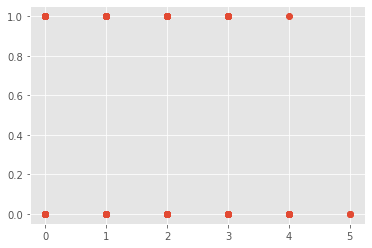

In [188]:
plt.scatter(df['children'], df['debt'])
plt.show()

**Observation**
<p> There is no correlation of the columns children and debt since the coefficient is close to 0. 

**Is there a correlation between family status and paying back on time?**

In [191]:
df['family_status'].describe()


count       19260
unique          5
top       married
freq        11098
Name: family_status, dtype: object

In [192]:
df['debt'].describe()

count    19260.000000
mean         0.081153
std          0.273076
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: debt, dtype: float64

**Is there a correlation between income level and paying back on time?**

In [213]:
df['total_income'].corr(df['debt'])

-0.012420686567347832

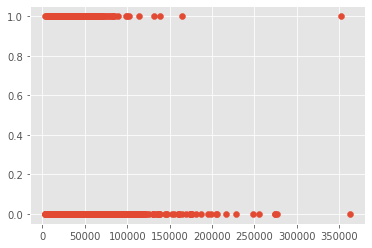

In [214]:
plt.scatter(df['total_income'], df['debt'])
plt.show()

Observation

There is a negative correlation of the columns total income and debt.

**Conclusion**

Based on my computations, the age groupings determines how likely the loan applicants will pay back their loan. 

**How does credit purpose affect the default rate?**

In [228]:
df_purpose = (df['purpose'].value_counts()/len(df)) * 100
print(df_purpose)

wedding ceremony                            3.722741
to have a wedding                           3.572170
having a wedding                            3.541018
real estate transactions                    3.177570
buy commercial real estate                  3.084112
purchase of the house                       3.058152
buying property for renting out             3.042575
housing                                     3.026999
transactions with commercial real estate    3.011423
building a real estate                      2.995846
purchase of my own house                    2.975078
housing transactions                        2.975078
property                                    2.959502
purchase of the house for my family         2.954309
building a property                         2.912773
transactions with my real estate            2.902388
construction of own property                2.897196
buy real estate                             2.855659
buy residential real estate                 2.

In [233]:
print(df_purpose.mean())

2.6315789473684212


# General Conclusion 


In [241]:
print(df['credit_score'].value_counts())

NO RISK          8849
MID-RISK         8644
CRITICAL RISK     782
RISK              763
ticket queued     222
Name: credit_score, dtype: int64


After processing and manipulating the data to be credible and accurate, I came up with the table above to determine loan applicants and their risk in paying back their loan. It seems that age group has more correlation to their ability to pay back their loan other than family status, the number of children, and the purpose of their loan. 